# K-means

In [76]:
import pandas as pd
import numpy as np
import math
import scipy as sp
from copy import deepcopy
import seaborn as sns
sns.set_palette("Set2")
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import datasets
iris = datasets.load_iris()
samples = iris.data

In [108]:
samples

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

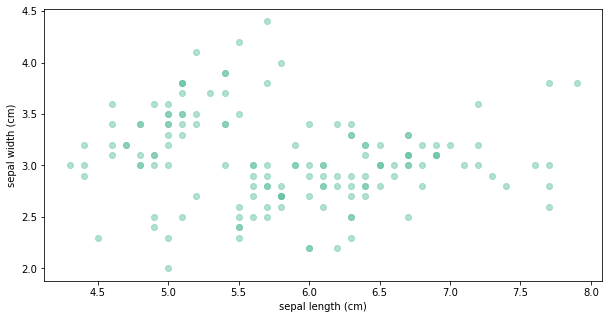

In [61]:
x = samples[:, 0]
y = samples[:, 1]
plt.figure(figsize=(10,5))
plt.scatter(x,y, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

In [24]:
k = 3
centroids_x = np.random.uniform(min(x), max(x), k)
centroids_y = np.random.uniform(min(y), max(y), k)
centroids = list(zip(centroids_x, centroids_y))

print(centroids)

[(5.453139483996616, 3.5938668900848363), (4.471491587943064, 3.192309546693929), (7.4864636626808805, 2.059878459039557)]


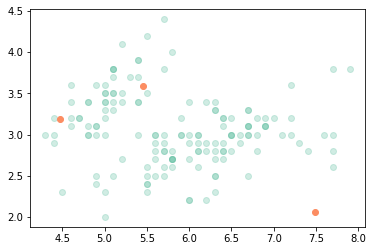

In [25]:
plt.scatter(x, y, alpha=0.3)
plt.scatter(centroids_x, centroids_y)
plt.show()

In [28]:
def distance(a, b):
    return sum([(el_a - el_b)**2 for el_a, el_b in list(zip(a,b))]) ** 0.5

In [34]:
labels = np.zeros(len(samples))
sepal_length_width = np.array(list(zip(x, y)))

for i in range(len(samples)):
    distances = np.zeros(k)
    
    for j in range(k):
        distances[j] = distance(sepal_length_width[i], centroids[j])
    
    cluster = np.argmin(distances)
    labels[i] = cluster

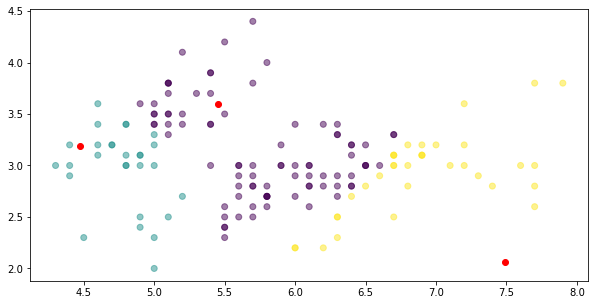

In [36]:
plt.figure(figsize=(10,5))
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids_x, centroids_y, c='red')
plt.show()

In [38]:
centroids_old = deepcopy(centroids)

for i in range(k):
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j]==i]
    centroids[i] = np.mean(points, axis=0)

In [47]:
centroids_old

[(5.453139483996616, 3.5938668900848363),
 (4.471491587943064, 3.192309546693929),
 (7.4864636626808805, 2.059878459039557)]

TypeError: list indices must be integers or slices, not tuple

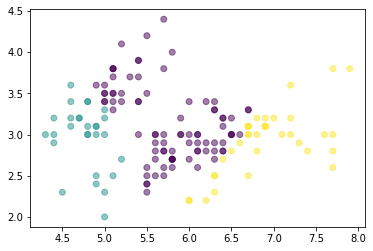

In [50]:
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids_old[:, 0], centroids_old[:, 1], c='blue')
plt.scatter(centroids[:,0], centroids[:,1], c='red')
plt.show()

### Scikit-learn

In [139]:
iris = datasets.load_iris()
target = iris.target
data = iris.data
data.shape, target.shape

((150, 4), (150,))

In [165]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [185]:
model = KMeans(n_clusters=3)
model.fit(data)
labels = model.predict(data)

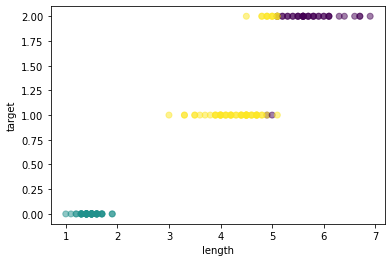

In [190]:
x = data[:,2]
y = iris.target[:]
plt.scatter(x, y, c=labels, alpha=0.5)
plt.xlabel('length')
plt.ylabel('target')
plt.show()

species  b''  \
labels         
0          0   
1          0   
2          2   

species  b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc8j\x9c\x05\x01\x00\x00\x00\xdch\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR'  \
labels                                                                                                                                                                                                                                                                                                                                            

species  b''  \
labels         
0          0   
1          0   
2          2   

species  b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc8j\x9c\x05\x01\x00\x00\x00\xdch\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR'  \
labels                                                                                                                                                                                                                                                                                                                                            

species  b''  \
labels         
0          0   
1          0   
2          2   

species  b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc8j\x9c\x05\x01\x00\x00\x00\xdch\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR'  \
labels                                                                                                                                                                                                                                                                                                                                            

species  b''  \
labels         
0          0   
1          0   
2          2   

species  b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc8j\x9c\x05\x01\x00\x00\x00\xdch\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR'  \
labels                                                                                                                                                                                                                                                                                                                                            

species  b''  \
labels         
0          0   
1          0   
2          2   

species  b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc8j\x9c\x05\x01\x00\x00\x00\xdch\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR'  \
labels                                                                                                                                                                                                                                                                                                                                            

species  b''  \
labels         
0          0   
1          0   
2          2   

species  b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc8j\x9c\x05\x01\x00\x00\x00\xdch\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR'  \
labels                                                                                                                                                                                                                                                                                                                                            

species  b''  \
labels         
0          0   
1          0   
2          2   

species  b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc8j\x9c\x05\x01\x00\x00\x00\xdch\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR'  \
labels                                                                                                                                                                                                                                                                                                                                            

species  b''  \
labels         
0          0   
1          0   
2          2   

species  b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc8j\x9c\x05\x01\x00\x00\x00\xdch\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR'  \
labels                                                                                                                                                                                                                                                                                                                                            

species  b''  \
labels         
0          0   
1          0   
2          2   

species  b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc8j\x9c\x05\x01\x00\x00\x00\xdch\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR'  \
labels                                                                                                                                                                                                                                                                                                                                            

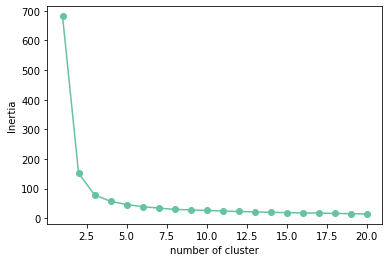

In [192]:
num_clusters = list(range(1, 21))
inertias = []

for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(data)
    inertias.append(model.inertia_)
    df = pd.DataFrame({'labels': labels, 'species': species})
    ct = pd.crosstab(df['labels'], df['species'])
    print(ct)
    
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('number of cluster')
plt.ylabel('Inertia')
plt.show()